In [1]:
from dtsp.dataset import arima, create_simple_seq2seq_dataset, create_simple_wavenet_dataset
from dtsp.models import SimpleSeq2Seq, SimpleWaveNet
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

Using TensorFlow backend.


## Simulate Arima Curve

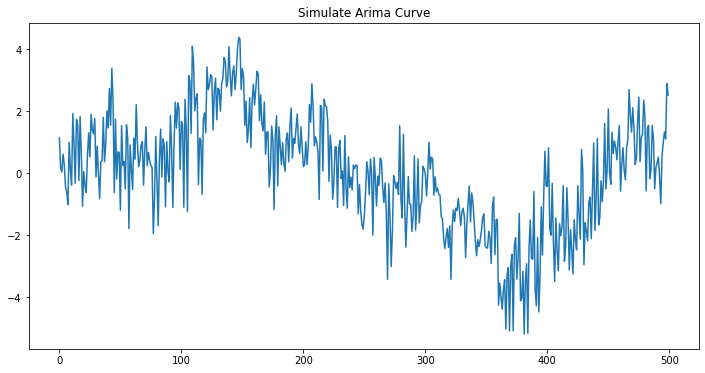

In [2]:
target_dim = 1
enc_lens = 80
dec_lens = 40
data_lens = 500
ar = {1: 0.21, 3: 0.39, 12: 0.4}
ma = {1: 0.62, 2: 0.20, 6: 0.18}
var = 1.
n_test = 80
batch_size = 16

series = arima(data_lens, ar=ar, ma=ar, var=var)
mu = series[: -(n_test+dec_lens)].mean()
std = series[: n_test+dec_lens].std()
series = (series - mu) / std

plt.figure(figsize=(12, 6))
plt.plot(series)
plt.title('Simulate Arima Curve')
plt.savefig('../assets/1_arima_curve.png')

## SimpleSeq2Seq

In [3]:
seq_train, seq_valid = create_simple_seq2seq_dataset(series, enc_lens, dec_lens, n_test, batch_size)
seq2seq = SimpleSeq2Seq(1, 32, "/home/zhouzr/test", dropout=0.1)
history = seq2seq.fit_generator(seq_train, seq_valid, epochs=100, verbose=0, shuffle=True)

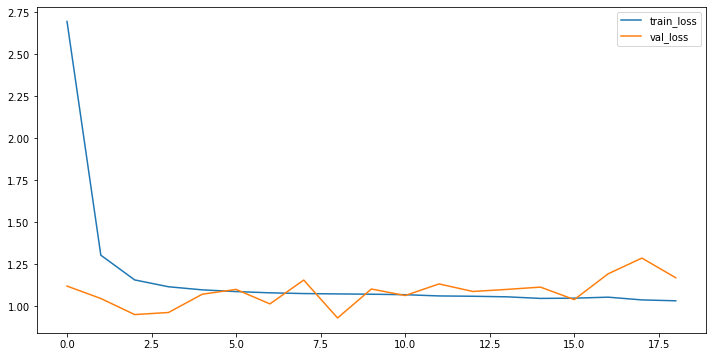

In [4]:
seq2seq.plot_loss()

In [5]:
def plot_seq2seq_prediction(idx):
    f = plt.figure()
    x, y_true = seq_valid.get(idx)
    y_pred = seq2seq.predict(x['enc_input'].reshape(1, enc_lens, target_dim), dec_lens)
    y_pred = np.concatenate(y_pred, axis=1).reshape(-1)
    y_true = y_true.reshape(-1)
    plt.plot(x['enc_input'].reshape(-1))
    plt.plot(range(enc_lens, enc_lens+dec_lens), y_pred, label='pred')
    plt.plot(range(enc_lens, enc_lens+dec_lens), y_true, label='true')
    plt.legend()

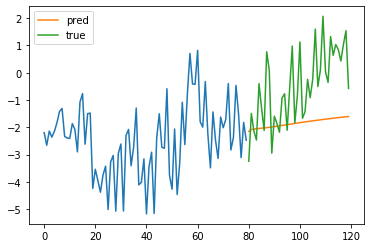

In [6]:
idx = 0
plot_seq2seq_prediction(idx)
plt.savefig(f'../assets/1_seq2seq_pred_{idx}.png')

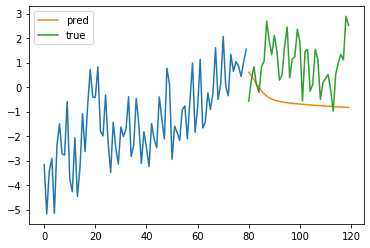

In [7]:
idx = 39
plot_seq2seq_prediction(idx)
plt.savefig(f'../assets/1_seq2seq_pred_{idx}.png')

## SimpleWaveNet

In [8]:
wave_train, wave_valid = create_simple_wavenet_dataset(series, enc_lens, dec_lens, n_test, batch_size)
wavenet = SimpleWaveNet(1, dec_lens, 36, 8, "/home/zhouzr/test", dropout=0.1, wavenet_mode='v2')
history = wavenet.fit_generator(wave_train, wave_valid, epochs=100, verbose=0, shuffle=True)

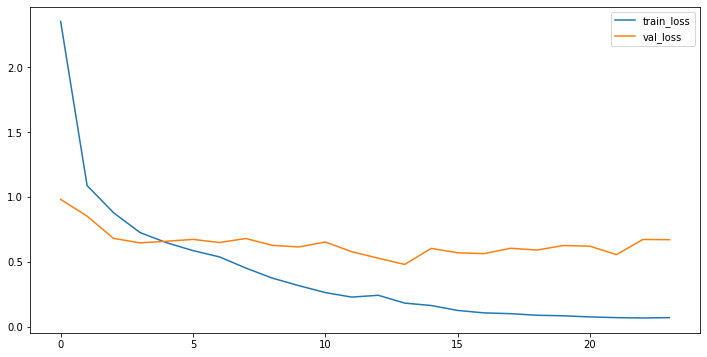

In [9]:
wavenet.plot_loss()

In [10]:
def plot_wavenet_prediction(idx):
    f = plt.figure()
    x, y_true = wave_valid.get(idx)
    y_pred = wavenet.predict(x, dec_lens).reshape(-1)
    y_true = y_true.reshape(-1)
    plt.plot(x.reshape(-1))
    plt.plot(range(enc_lens, enc_lens+dec_lens), y_pred, label='pred')
    plt.plot(range(enc_lens, enc_lens+dec_lens), y_true, label='true')
    plt.legend()

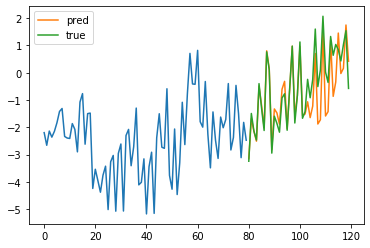

In [11]:
idx = 0
plot_wavenet_prediction(idx)
plt.savefig(f'../assets/1_wavenet_pred_{idx}.png')

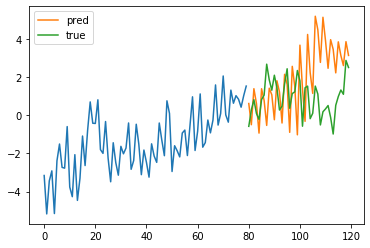

In [12]:
idx = 39
plot_wavenet_prediction(idx)
plt.savefig(f'../assets/1_wavenet_pred_{idx}.png')